## Simulating neural activity as a branching process

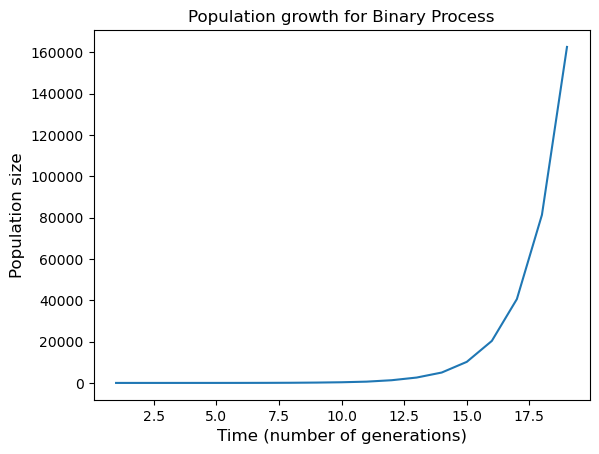

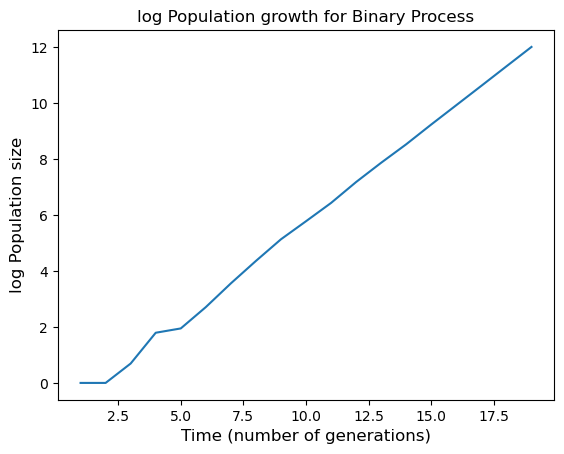

In [44]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd


def branching_process(lam,n):
    Z = [1]
    u = np.random.uniform(0,1)
    
    for i in range(1,n):
        if Z[i-1] > 0:
            p  = (2 - lam)/2
            if u < p:
                x = 0
            else:
                x = np.sum(np.random.poisson(lam,size=Z[i-1]))
            Z.append(x)
            if x>10**5:
                break
        else:
            break
    
    return Z


pop_size = branching_process(2,50)
time = np.arange(1,len(pop_size)+1,1)

fig1 = plt.figure()
plt.plot(time, pop_size)
plt.title("Population growth for Binary Process")
plt.xlabel("Time (number of generations)", fontsize=12)
plt.ylabel("Population size", fontsize=12)
plt.savefig('Binary_Population')
plt.show()


fig2 = plt.figure()
plt.plot(time, np.log(pop_size))
plt.title("log Population growth for Binary Process")
plt.xlabel("Time (number of generations)", fontsize=12)
plt.ylabel("log Population size", fontsize=12)
plt.savefig('Binary_Log_Population')
plt.show()

In [45]:
# calculate avalanche duration and total population size

def aval_data(lam,n):
    trials = 5000
    life = []
    total_pop = []
    
    for x in range(0,trials):
        pop_size = branching_process(lam,n)
        total_pop.append(np.sum(pop_size))
        zero_idx = np.argwhere(np.array(pop_size)==0).squeeze().tolist()
        # print(pop_size)
        # print(zero_idx)
        if type(zero_idx)==int:
            zero_idx = [zero_idx]
        if len(zero_idx)>0:
            life.append(zero_idx[0])
        else:
            life.append(np.nan)
        
    return (total_pop, life)

In [46]:
# calculate avalanche statistics and plot histograms

def aval_stats(lam,n):
    size, duration = aval_data(lam,n)
    
    fig3 = plt.figure()
    counts_S, bins_S, p1 = plt.hist(size, label = "Avalanche size")
    S = bins_S[1:np.size(bins_S)]
    prob_S = counts_S/np.sum(counts_S)
    plt.title("Avalanche size")
    plt.legend()
    plt.savefig('Binary_Histogram_size')
    plt.show()
    
    fig4 = plt.figure()
    counts_D, bins_D, p2 = plt.hist(duration, label = "Avalanche duration")
    prob_D = counts_D/np.sum(counts_D)
    D = bins_D[1:np.size(bins_D)]
    plt.title("Avalanche duration")
    plt.legend()
    plt.savefig('Binary_Histogram_duration')
    plt.show()
    
    return(prob_S,S,prob_D,D)
    

In [47]:
# calculate tau s and tau t and plots log-log plots

def log_slope(lam,n):
    p_s,s,p_d,d = aval_stats(lam,n)
    
    log_ps = np.log(p_s)
    log_pd = np.log(p_d)
    
    log_s = np.log(s)
    log_d = np.log(d)

    slope_S = (log_ps[np.size(log_ps)-1] - log_ps[0])/(log_s[np.size(log_s)-1] - log_s[0])
    slope_D = (log_pd[np.size(log_pd)-1] - log_pd[0])/(log_d[np.size(p_d)-1] - log_d[0])
    
    a_s,b_s = np.polyfit(log_s,log_ps,1)
    a_d,b_d = np.polyfit(log_d,log_pd,1)
    
    y_s = (a_s * log_s)+b_s
    y_d = (a_d * log_d)+b_d
    
    fig5 = plt.figure()
    plt.plot(log_s,log_ps, label = "Actual simulation")
    plt.plot(log_s,y_s, label = "Best fit")
    plt.title("log-log plot for size")
    plt.xlabel("log(S)", fontsize=12)
    plt.ylabel("log(P(S))", fontsize=12)
    plt.legend()
    plt.savefig('Log-log_Binary_size')
    plt.show()

    fig6 = plt.figure()
    plt.plot(log_d,log_pd, label = "Actual simulation")
    plt.plot(log_d,y_d, label = "Best fit")
    plt.title("log-log plot for duration")
    plt.xlabel("log(D)", fontsize=12)
    plt.ylabel("log(P(D))", fontsize=12)
    plt.legend()
    plt.savefig('Log-log_Binary_duration')
    plt.show()
    
    return(s,d,p_s,p_d,slope_S,slope_D)

In [48]:
# calculate gamma and plot log-log plots

def gamma_size(lam,n):
    
    size, duration = aval_data(lam,n)
    
    df = pd.DataFrame(data = np.column_stack((size,duration)),columns=['Size','Duration'])
    
    df = df.groupby(pd.cut(df['Duration'],bins=n)).mean()
    df = df.dropna()
    
    D = df['Duration'].values
    ST = df['Size'].values
    
    log_ST = np.log(ST)
    log_T = np.log(D)
    
    a_t,b_t = np.polyfit(log_T,log_ST,1)
    
    y_t = (a_t * log_T)+b_t
    
    slope_gamma = (log_ST[np.size(log_ST)-1] - log_ST[0])/(log_T[np.size(log_T)-1] - log_T[0])
    
    plt.plot(log_T,log_ST, label = "Actual simulation")
    plt.plot(log_T,y_t, label = "Best fit")
    plt.title("log-log plot for gamma")
    plt.xlabel("log(T)")
    plt.ylabel("log<S>T")
    plt.legend()
    plt.savefig('log_log_binary_gamma')
    plt.show()
    
    return(D,ST,slope_gamma)
    

Data for lambda =  2


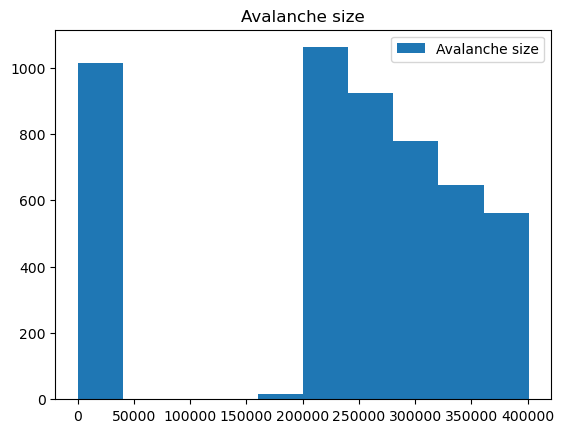

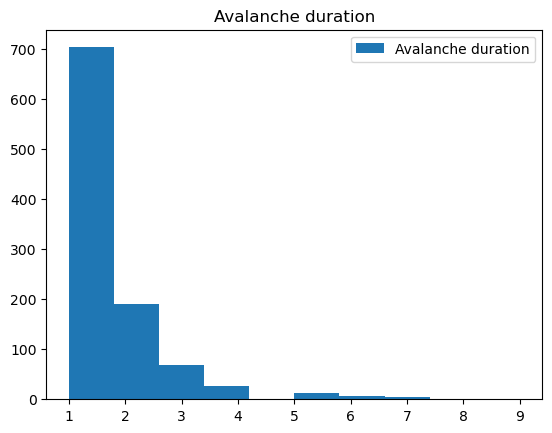

/tmp/ipykernel_3392/4140757053.py:6: RuntimeWarning: divide by zero encountered in log
  log_ps = np.log(p_s)
/tmp/ipykernel_3392/4140757053.py:7: RuntimeWarning: divide by zero encountered in log
  log_pd = np.log(p_d)


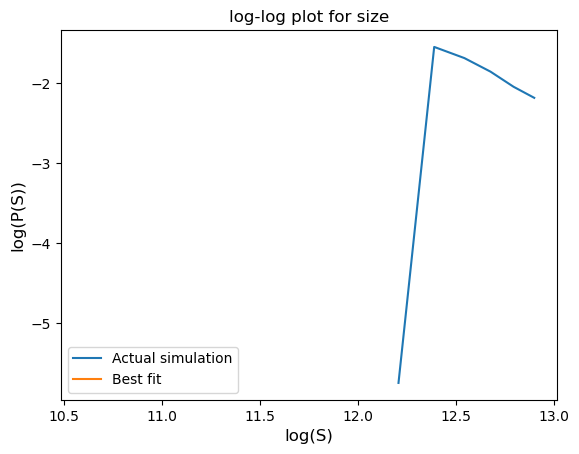

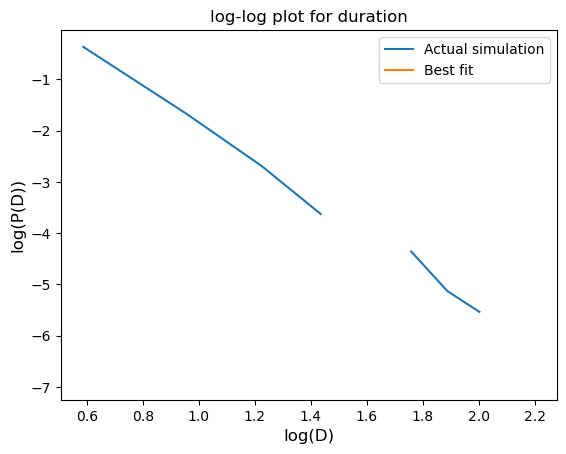

Tau S -  [-0.25630414]
Tau T -  [-4.07307225]


In [49]:
# actual calculations for tau

lam = 2
n = 1000
slope_Size = []
slope_Duration = []

Size = [0]
Duration = [0]
PS = [0]
PD = [0]

for i in range(1):
    print("Data for lambda = ", lam)
    s,d,p_s,p_d,sls,sld = log_slope(lam,n)
    
    Size[i] = s
    Duration[i] = d
    PS[i] = p_s
    PD[i] = p_d
    slope_Size = np.append(slope_Size,sls)
    slope_Duration = np.append(slope_Duration,sld)
    

print("Tau S - ", slope_Size)
print("Tau T - ", slope_Duration)



Data for lambda =  2


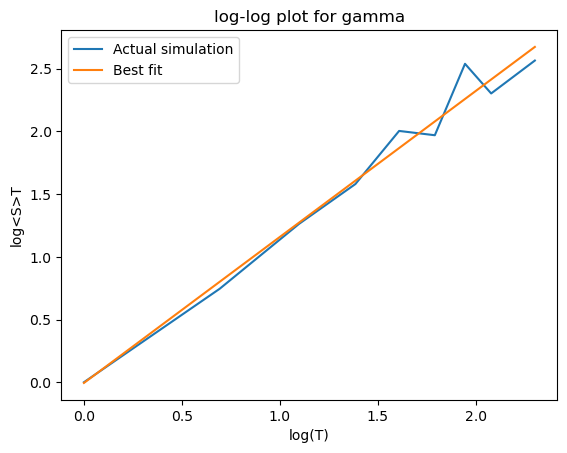

Gamma -  [1.11394335]


In [50]:
# actual calculations for gamma

slope_Gamma = []
Time = [0]
ST = [0]

for i in range(1):
    print("Data for lambda = ", lam)
    t,st,slg = gamma_size(lam,n)
    
    Time[i] = t
    ST[i] = st
    slope_Gamma = np.append(slope_Gamma,slg)


gamma = np.mean(slope_Gamma)
print("Gamma - ", slope_Gamma)
    

In [51]:
predicted_Gamma = (slope_Duration - 1)/(slope_Size - 1)

print("Predicted gamma according to scaling relation ", predicted_Gamma)

Predicted gamma according to scaling relation  [4.03809244]


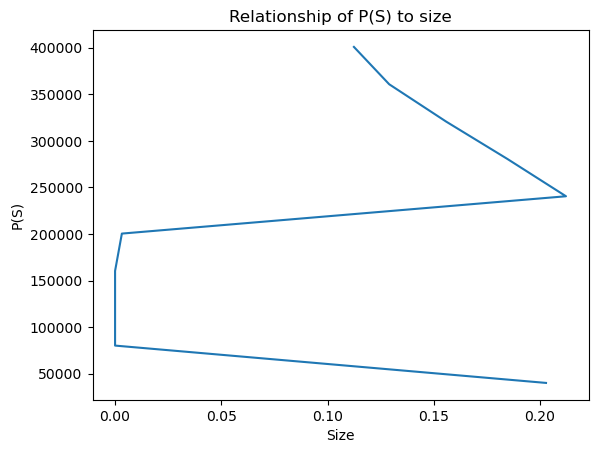

In [52]:
for i in range(1):
    plt.plot(PS[i], Size[i])
    plt.title("Relationship of P(S) to size")
    plt.xlabel("Size")
    plt.ylabel("P(S)")
    plt.savefig('Ps_size')

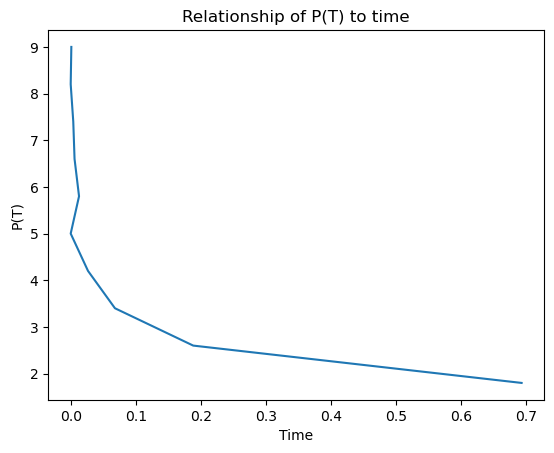

In [53]:
for i in range(1):
    plt.plot(PD[i], Duration[i])
    plt.title("Relationship of P(T) to time")
    plt.xlabel("Time")
    plt.ylabel("P(T)")
    plt.savefig('Pt_time')

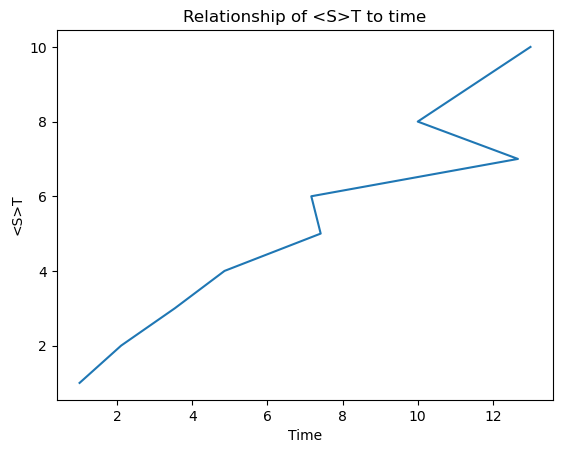

In [54]:
for i in range(1):
    plt.plot(ST[i], Time[i])
    plt.title("Relationship of <S>T to time")
    plt.xlabel("Time")
    plt.ylabel("<S>T")
    plt.savefig('St_time')